In [9]:
pip install nltk

In [10]:
import numpy as np
import pandas as pd
from typing import Dict
import matplotlib.pyplot as plt
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer

## SCENARIO 1: A 2-headed coin

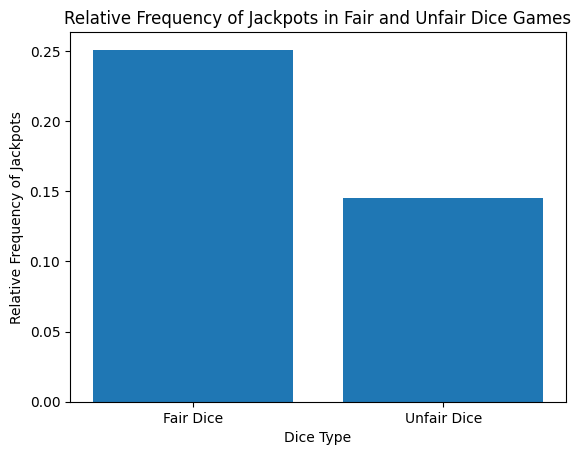

In [11]:
fair_coin = Die(['H', 'T'])
fair_coin2 = Die(['H', 'T'])
fair_coin3 = Die(['H', 'T'])
unfair_coin_1 = Die(['H', 'T'])
unfair_coin_1.change_weight('H', 5)  # Setting weight 5 for face 'H'

unfair_coin_2 = Die(['H', 'T'])
unfair_coin_2.change_weight('T', 5)  # Setting weight 5 for face 'T'

fair_game = Game([fair_coin, fair_coin2, fair_coin3])
unfair_game = Game([fair_coin, unfair_coin_1, unfair_coin_2])
# Create Analyzer objects
fair_analyzer = Analyzer([fair_game])
unfair_analyzer = Analyzer([unfair_game])
# Compute jackpot frequencies
jackpot_fair_df = fair_analyzer.compute_jackpot(1000)
jackpot_unfair_df = unfair_analyzer.compute_jackpot(1000)

# Calculate relative frequencies
fair_jackpot_freq = jackpot_fair_df['jackpot_count'].sum() / 1000
unfair_jackpot_freq = jackpot_unfair_df['jackpot_count'].sum() / 1000

# Create a bar chart
labels = ['Fair Dice', 'Unfair Dice']
jackpot_freqs = [fair_jackpot_freq, unfair_jackpot_freq]

plt.bar(labels, jackpot_freqs)
plt.xlabel('Dice Type')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Relative Frequency of Jackpots in Fair and Unfair Dice Games')
plt.show()


## Scenario 2: A 6-sided die

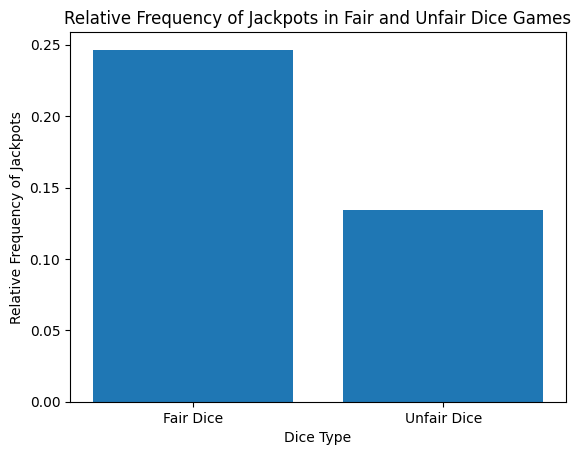

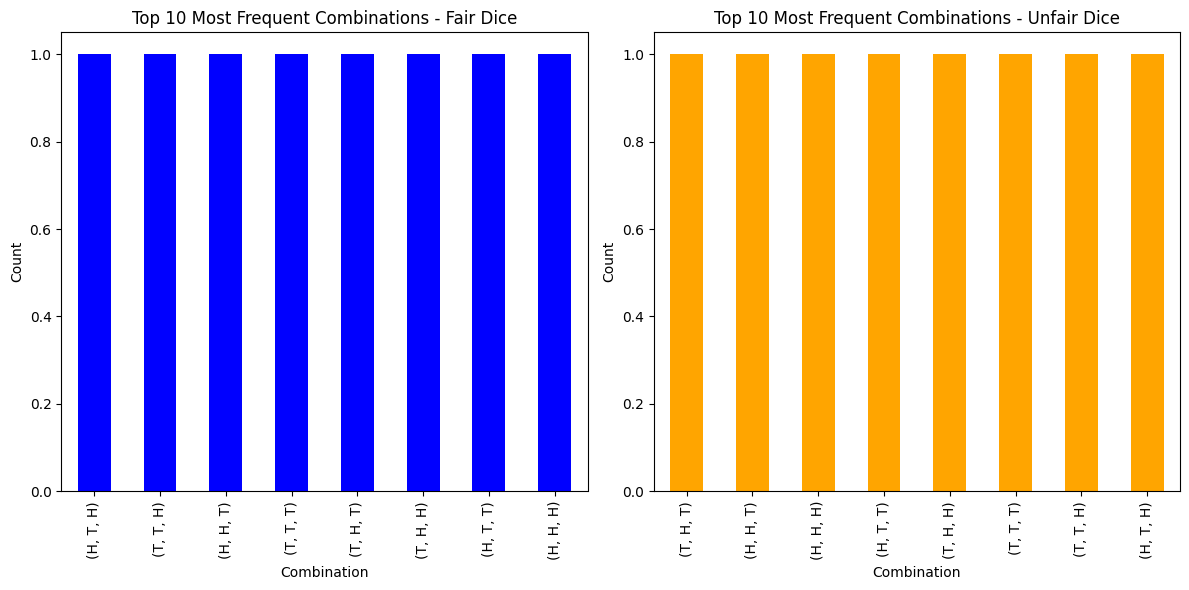

In [12]:
# Play the games
times = 10000
fair_analyzer = Analyzer([fair_game])
unfair_analyzer = Analyzer([unfair_game])

# Compute relative frequencies of jackpots
fair_jackpot_df = fair_analyzer.compute_jackpot(times)
unfair_jackpot_df = unfair_analyzer.compute_jackpot(times)

# Calculate relative frequencies
fair_jackpot_freq = fair_jackpot_df['jackpot_count'].sum() / times
unfair_jackpot_freq = unfair_jackpot_df['jackpot_count'].sum() / times

# Create a bar chart for jackpot frequencies
labels = ['Fair Dice', 'Unfair Dice']
jackpot_freqs = [fair_jackpot_freq, unfair_jackpot_freq]

plt.bar(labels, jackpot_freqs)
plt.xlabel('Dice Type')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Relative Frequency of Jackpots in Fair and Unfair Dice Games')
plt.show()

# Compute 10 most frequent combinations of faces for each game
fair_combinations = fair_analyzer.compute_combo(times)['combinations'].value_counts().nlargest(10)
unfair_combinations = unfair_analyzer.compute_combo(times)['combinations'].value_counts().nlargest(10)

# Plot bar charts for the most frequent combinations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fair_combinations.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Combinations - Fair Dice')
plt.xlabel('Combination')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
unfair_combinations.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Combinations - Unfair Dice')
plt.xlabel('Combination')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Scenario 3: Letters of the Roman Alpha

In [13]:
import string

# Get the frequency of each letter in the English language
letter_frequency = {
    letter: frequency for letter, frequency in zip(string.ascii_lowercase, [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.361, 0.150, 1.974, 0.074])
}

# Create a Die object with letters and their weights
die_letters = Die(list(letter_frequency.keys()))
for letter, weight in letter_frequency.items():
    die_letters.change_weight(letter, weight)

In [14]:
# Create a game with 5 dice
dice_list = [die_letters] * 5
game = Game(dice_list)

# Play the game with 1000 rolls
times = 1000
game_results = game.play(times)

# Display the results
print(game_results)

            face_rolled            
die_number            0  1  2  3  4
roll_number                        
1                     n  i  s  o  e
2                     h  a  k  u  o
3                     e  s  s  e  t
4                     i  i  g  h  h
5                     w  o  l  h  n
...                 ... .. .. .. ..
996                   s  d  u  r  w
997                   i  s  r  s  a
998                   k  o  s  e  e
999                   y  m  o  k  i
1000                  h  o  w  t  a

[1000 rows x 5 columns]


In [15]:
import string
import nltk
from nltk.corpus import words

nltk.download('words')

# Get the list of valid English words
english_words = set(words.words())

# Check if combinations are valid English words
valid_word_count = 0
for row_index, row in game_results.iterrows():
    combination = ''.join(row)
    if combination in english_words:
        valid_word_count += 1

print(f"Number of valid English word combinations: {valid_word_count}")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\brittnyh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Number of valid English word combinations: 4


In [16]:
Relative_Frequency = valid_word_count / 1000
Relative_Frequency 

0.004